In [60]:
import pandas as pd
import matplotlib.pyplot as plt

DATA_PATH = "./user_app_data.csv"

def read_csv_data(data_path):
    """
    Lee un archivo csv y retorna un dataframe
    Args:
        data_path: str, ruta del archivo csv
    Returns:
        df: pd.DataFrame, dataframe con los datos del archivo csv
    """
    # Si la ruta del archivo está vacía, retorna None
    if data_path is None or len(data_path) == 0:
        print("La ruta del archivo está vacía")
        return None
    
    try:
        df = pd.read_csv(data_path)
        return df
    except FileNotFoundError:
        # Si el archivo no se encuentra, retorna None
        print(f"No se pudo encontrar el archivo en la ruta: {data_path}")
        return None
    except Exception as e:
        # Si ocurre un error, retorna None
        print(f"Error al leer el archivo: {e}")
        return None

print(f"Intentando leer archivo desde: {DATA_PATH}")
df = read_csv_data(DATA_PATH)

if df is None:
    print("No se pudo leer el archivo")
    exit()


Intentando leer archivo desde: ./user_app_data.csv


In [61]:
# 1.- Limpieza de datos
# validación de datos duplicados

if len(df[df.duplicated()]) < 0:
    print("el dataset tiene duplicados")

# encontrar valores nulos
if df.isnull().sum().sum() > 0:
    print("El dataset tiene valores nulos")

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             300 non-null    int64  
 1   app_version         300 non-null    float64
 2   platform            300 non-null    object 
 3   session_duration    300 non-null    int64  
 4   number_of_sessions  300 non-null    int64  
 5   country             300 non-null    object 
 6   user_feedback       300 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 16.5+ KB


In [62]:
# se hacen coincidir las columnas platform y country al tipo de dato String y se 
# estandarizan los valores string a minusculas
df['platform'] = df['platform'].str.lower().astype('string')
df['country'] = df['country'].str.lower().astype('string')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             300 non-null    int64  
 1   app_version         300 non-null    float64
 2   platform            300 non-null    string 
 3   session_duration    300 non-null    int64  
 4   number_of_sessions  300 non-null    int64  
 5   country             300 non-null    string 
 6   user_feedback       300 non-null    int64  
dtypes: float64(1), int64(4), string(2)
memory usage: 16.5 KB


In [64]:
# validar que las sesiones no tengan una duracion menor o igual a cero
# y que no tengan una duracion mayor a 600 horas
if (df['session_duration'] <= 0).any():
    print("Hay sesiones con duración menor o igual a cero")

if ((df['session_duration'] < 1) | (df['session_duration'] > 600)).any():
    print("Hay sesiones fuera del rango permitido (1-600 horas)")

In [67]:
df

,user_id,app_version,platform,session_duration,number_of_sessions,country,user_feedback,total_session_time
0,1,1.2,android,109,11,france,1,1199
1,2,1.3,android,116,17,uk,2,1972
2,3,1.0,android,94,13,france,5,1222
3,4,1.2,ios,47,1,canada,4,47
4,5,1.2,ios,99,2,canada,3,198
...,...,...,...,...,...,...,...,...
295,296,1.3,ios,33,4,uk,1,132
296,297,1.1,android,118,6,germany,2,708
297,298,1.2,android,65,1,germany,5,65
298,299,1.0,ios,146,5,france,5,730


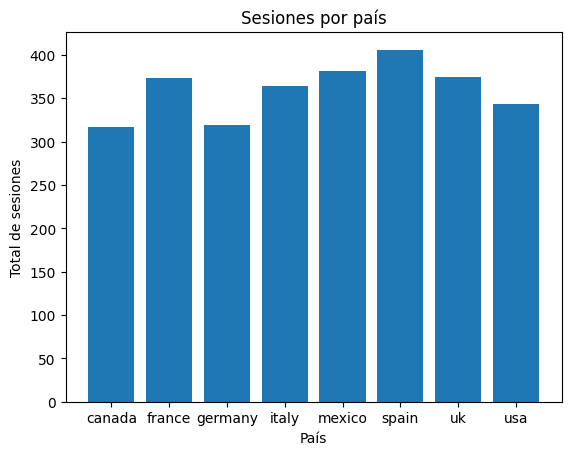

In [72]:
# grafico de sesiones por pais
df_country = df.groupby('country')['number_of_sessions'].sum().reset_index()

plt.bar(df_country['country'], df_country['number_of_sessions'])
plt.xlabel('País')
plt.ylabel('Total de sesiones')
plt.title('Sesiones por país')
plt.show()

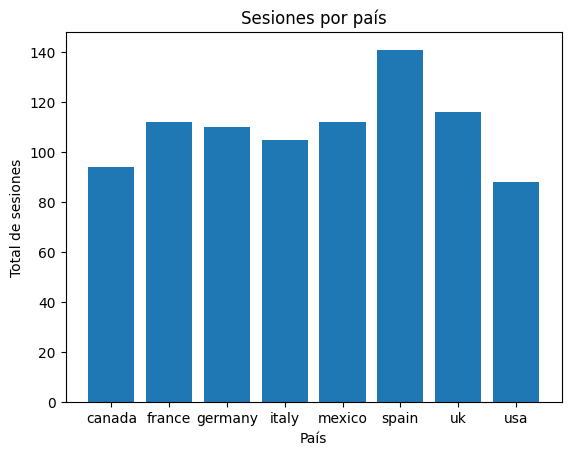

In [71]:
# grafico de sesiones por pais
df_feedbacks_country = df.groupby('country')['user_feedback'].sum().reset_index()

plt.bar(df_feedbacks_country['country'], df_feedbacks_country['user_feedback'])
plt.xlabel('País')
plt.ylabel('Total de sesiones')
plt.title('Sesiones por país')
plt.show()

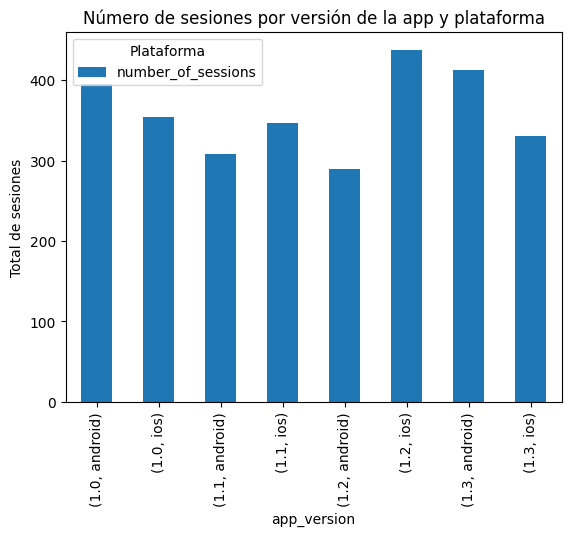

In [65]:
# Agrupar por app_version y platform, sumar el número de sesiones
df_sessions = df.groupby(['app_version', 'platform'])['number_of_sessions'].sum()
labels = df_sessions.index.get_level_values(0)
# Crear gráfico de barras
df_sessions.plot(kind='bar', x=labels, y=df_sessions)

# Añadir título y etiquetas
plt.title("Número de sesiones por versión de la app y plataforma")
plt.xlabel("app_version")
plt.ylabel("Total de sesiones")
plt.legend(title="Plataforma")

# Mostrar gráfico
plt.show()

En este gráfico se pueden observar el número de sesiones según plataforma y versión. Se observa que para Ios 1.2 alcanza el máximo de sesiones, y android 1.2 alcanza el mínimo de sesiones.

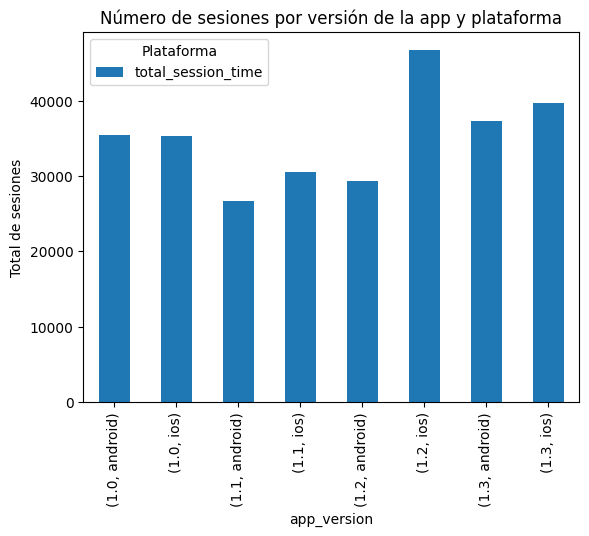

In [66]:
# Agrupar por app_version y platform, sumar el número de sesiones y multiplicado por session_duration
# se crea una nueva columna con el total de tiempo de sesiones
df['total_session_time'] = df['number_of_sessions'] * df['session_duration']
df_sessions_v2 = df.groupby(['app_version', 'platform'])['total_session_time'].sum()

# se obtienen los labels de la columna app_version
labels = df_sessions_v2.index.get_level_values(0)
# Crear gráfico de barras
df_sessions_v2.plot(kind='bar', x=labels, y=df_sessions_v2)

# Agrupar por app_version y platform, sumar la duración total de sesiones
df_sessions_v2 = df.groupby(['app_version', 'platform'])['total_session_time'].sum()

plt.title("Número de sesiones por versión de la app y plataforma")
plt.xlabel("app_version")
plt.ylabel("Total de sesiones")
plt.legend(title="Plataforma")

# Mostrar gráfico
plt.show()

Se obtienen las horas de sesión por plataforma y versión. Se observa que Ios 1.2 tiene la mayor cantaidad de horas de sesión, y Android 1.1, tiene la menor cantidad de horas de sesión.